In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC, SVR
from sklearn.metrics import accuracy_score, mean_squared_error
import requests
import joblib
import os

# ==== STEP 1: Load Data ====
soil_path = r"C:/Users/Asus/Desktop/BIG data Project/Fertilizer Prediction.csv"
yield_path = r"C:/Users/Asus/Desktop/BIG data Project/Crop yeild.csv"
fertilizer_path = r"C:/Users/Asus/Desktop/BIG data Project/Fertilizer Prediction.csv"
model_dir = r"C:/Users/Asus/Desktop/BIG data Project/models" 

# Create model directory if not exists
os.makedirs(model_dir, exist_ok=True)

soil_df = pd.read_csv(soil_path)
yield_df = pd.read_csv(yield_path)
fertilizer_df = pd.read_csv(fertilizer_path)

# ==== STEP 2: Soil Classification ====
print("\n----- SOIL CLASSIFICATION -----")
le_soil = LabelEncoder()
soil_df["soil_type_label"] = le_soil.fit_transform(soil_df["soil_type"])

X = soil_df.drop(columns=["soil_type", "soil_type_label"])
y = soil_df["soil_type_label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_soil = RandomForestClassifier()
rf_soil.fit(X_train, y_train)
rf_acc = accuracy_score(y_test, rf_soil.predict(X_test))
print("Random Forest Accuracy:", rf_acc)

svm_soil = SVC()
svm_soil.fit(X_train, y_train)
svm_acc = accuracy_score(y_test, svm_soil.predict(X_test))
print("SVM Accuracy:", svm_acc)

# ==== STEP 3: Crop Yield Prediction ====
print("\n----- CROP YIELD PREDICTION -----")
le_loc = LabelEncoder()
yield_df["Location"] = le_loc.fit_transform(yield_df["Location"])
yield_df["Crop"] = yield_df["Crop"].str.strip()

X = yield_df.drop(columns=["Crop", "Yield"])
y = yield_df["Yield"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_yield = RandomForestRegressor()
rf_yield.fit(X_train, y_train)
rf_rmse = mean_squared_error(y_test, rf_yield.predict(X_test), squared=False)
print("Random Forest RMSE:", rf_rmse)

svm_yield = SVR()
svm_yield.fit(X_train, y_train)
svm_rmse = mean_squared_error(y_test, svm_yield.predict(X_test), squared=False)
print("SVM RMSE:", svm_rmse)

# ==== STEP 4: Fertilizer Recommendation ====
print("\n----- FERTILIZER RECOMMENDATION -----")
def recommend_fertilizer(crop, soil_type):
    row = fertilizer_df[(fertilizer_df["Crop"].str.lower() == crop.lower()) &
                        (fertilizer_df["SoilType"].str.lower() == soil_type.lower())]
    if not row.empty:
        return row.iloc[0]["Fertilizer"], row.iloc[0]["Dosage"]
    return "No match found", "N/A"

crop = "Wheat"
soil_type = "Loamy"
fert, dose = recommend_fertilizer(crop, soil_type)
print(f"Fertilizer for {crop} in {soil_type} soil: {fert}, Dosage: {dose}")

# ==== STEP 5: Weather Info via OpenWeatherMap API ====
print("\n----- WEATHER INFORMATION -----")
def get_weather(city, api_key):
    url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_key}&units=metric"
    res = requests.get(url).json()
    if res.get("main"):
        weather = {
            "Temperature (°C)": res["main"]["temp"],
            "Humidity (%)": res["main"]["humidity"],
            "Pressure (hPa)": res["main"]["pressure"],
            "Description": res["weather"][0]["description"]
        }
        return weather
    else:
        print("Error fetching weather:", res)
        return {}

# Replace with your actual OpenWeatherMap API key
api_key = "258e45a716dcfd13dd6436a3281ffa5f"
city = "Nashik"
weather_data = get_weather(city, api_key)
for k, v in weather_data.items():
    print(f"{k}: {v}")

# ==== STEP 6: Save Models ====
joblib.dump(rf_soil, os.path.join(model_dir, "rf_soil.pkl"))
joblib.dump(rf_yield, os.path.join(model_dir, "rf_yield.pkl"))



----- SOIL CLASSIFICATION -----


KeyError: 'soil_type'

# Assistant
The error occurs because the code is trying to access variables that don't exist or haven't been properly defined. The main issue is with the `train_test_split` function call and missing variables.

Let me explain the issues:

1. The `train_test_split` function should return multiple variables (X_train, X_test, y_train, y_test), but in your code, it's only assigned to `y_test`.
2. The code references variables like `X_train`, `X_test`, and `y_train` that haven't been defined.
3. There's also a reference to `rf_soil` in the last section that wasn't defined earlier.

Would you like me to provide the corrected code?

In [14]:
# First, make sure to import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import requests
import joblib
import os

# Create model directory if it doesn't exist
model_dir = "models"
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

# Correct the train_test_split call to get all required variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf_yield = RandomForestRegressor()
rf_yield.fit(X_train, y_train)
rf_rmse = mean_squared_error(y_test, rf_yield.predict(X_test), squared=False)
print("Random Forest RMSE:", rf_rmse)

# Train SVM model
svm_yield = SVR()
svm_yield.fit(X_train, y_train)
svm_rmse = mean_squared_error(y_test, svm_yield.predict(X_test), squared=False)
print("SVM RMSE:", svm_rmse)

# ==== STEP 4: Fertilizer Recommendation ====
print("\n----- FERTILIZER RECOMMENDATION -----")
def recommend_fertilizer(crop, soil_type):
    # Make sure fertilizer_df is defined or imported before this function is called
    row = fertilizer_df[(fertilizer_df["Crop"].str.lower() == crop.lower()) &
                        (fertilizer_df["SoilType"].str.lower() == soil_type.lower())]
    if not row.empty:
        return row.iloc[0]["Fertilizer"], row.iloc[0]["Dosage"]
    return "No match found", "N/A"

crop = "Wheat"
soil_type = "Loamy"
fert, dose = recommend_fertilizer(crop, soil_type)
print(f"Fertilizer for {crop} in {soil_type} soil: {fert}, Dosage: {dose}")

# ==== STEP 5: Weather Info via OpenWeatherMap API ====
print("\n----- WEATHER INFORMATION -----")
def get_weather(city, api_key):
    url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_key}&units=metric"
    res = requests.get(url).json()
    if res.get("main"):
        weather = {
            "Temperature (°C)": res["main"]["temp"],
            "Humidity (%)": res["main"]["humidity"],
            "Pressure (hPa)": res["main"]["pressure"],
            "Description": res["weather"][0]["description"]
        }
        return weather
    else:
        print("Error fetching weather:", res)
        return {}

# Replace with your actual OpenWeatherMap API key
api_key = "258e45a716dcfd13dd6436a3281ffa5f"
city = "Nashik"
weather_data = get_weather(city, api_key)
for k, v in weather_data.items():
    print(f"{k}: {v}")

# ==== STEP 6: Save Models ====
# Define rf_soil model before saving it (this was missing in the original code)
rf_soil = RandomForestRegressor()
# You would need to train this model with appropriate data
# rf_soil.fit(X_soil_train, y_soil_train)  # Uncomment and adjust once you have soil data

# Save models
joblib.dump(rf_soil, os.path.join(model_dir, "rf_soil.pkl"))
joblib.dump(rf_yield, os.path.join(model_dir, "rf_yield.pkl"))

NameError: name 'X' is not defined

In [16]:
# First, define your data variables before using them
import numpy as np
import pandas as pd
import os
import joblib
import requests
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Create a directory for models if it doesn't exist
model_dir = "models"
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

# ==== STEP 1: Load or create your dataset ====
# Example: Create a simple dataset for demonstration
# In a real scenario, you would load your actual data
# For soil analysis
soil_data = pd.DataFrame({
    'pH': np.random.uniform(5.5, 7.5, 100),
    'N': np.random.uniform(0, 100, 100),
    'P': np.random.uniform(0, 100, 100),
    'K': np.random.uniform(0, 100, 100),
    'organic_matter': np.random.uniform(1, 5, 100)
})

# For yield prediction
yield_data = pd.DataFrame({
    'N': np.random.uniform(0, 100, 100),
    'P': np.random.uniform(0, 100, 100),
    'K': np.random.uniform(0, 100, 100),
    'temperature': np.random.uniform(15, 35, 100),
    'humidity': np.random.uniform(30, 90, 100),
    'rainfall': np.random.uniform(50, 200, 100),
    'yield': np.random.uniform(20, 50, 100)
})

# Create fertilizer dataframe
fertilizer_df = pd.DataFrame({
    'Crop': ['Wheat', 'Rice', 'Corn'],
    'SoilType': ['Loamy', 'Clay', 'Sandy'],
    'Fertilizer': ['NPK 10-26-26', 'Urea', 'DAP'],
    'Dosage': ['250 kg/ha', '175 kg/ha', '200 kg/ha']
})

# ==== STEP 2: Prepare data for modeling ====
# For soil model
X_soil = soil_data[['pH', 'N', 'P', 'K']]
y_soil = soil_data['organic_matter']
X_soil_train, X_soil_test, y_soil_train, y_soil_test = train_test_split(X_soil, y_soil, test_size=0.2, random_state=42)

# For yield model
X = yield_data[['N', 'P', 'K', 'temperature', 'humidity', 'rainfall']]
y = yield_data['yield']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ==== STEP 3: Train models ====
# Train soil model
rf_soil = RandomForestRegressor(n_estimators=100, random_state=42)
rf_soil.fit(X_soil_train, y_soil_train)

# Train yield model
rf_yield = RandomForestRegressor(n_estimators=100, random_state=42)
rf_yield.fit(X_train, y_train)

# Now your original code should work
# ==== STEP 4: Fertilizer Recommendation ====
print("\n----- FERTILIZER RECOMMENDATION -----")
def recommend_fertilizer(crop, soil_type):
    # Make sure fertilizer_df is defined or imported before this function is called
    row = fertilizer_df[(fertilizer_df["Crop"].str.lower() == crop.lower()) &
                        (fertilizer_df["SoilType"].str.lower() == soil_type.lower())]
    if not row.empty:
        return row.iloc[0]["Fertilizer"], row.iloc[0]["Dosage"]
    return "No match found", "N/A"

crop = "black"
soil_type = "oil seeds"
fert, dose = recommend_fertilizer(crop, soil_type)
print(f"Fertilizer for {crop} in {soil_type} soil: {fert}, Dosage: {dose}")

# ==== STEP 5: Weather Info via OpenWeatherMap API ====
print("\n----- WEATHER INFORMATION -----")
def get_weather(city, api_key):
    url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_key}&units=metric"
    res = requests.get(url).json()
    if res.get("main"):
        weather = {
            "Temperature (°C)": res["main"]["temp"],
            "Humidity (%)": res["main"]["humidity"],
            "Pressure (hPa)": res["main"]["pressure"],
            "Description": res["weather"][0]["description"]
        }
        return weather
    else:
        print("Error fetching weather:", res)
        return {}

# Replace with your actual OpenWeatherMap API key
api_key = "258e45a716dcfd13dd6436a3281ffa5f"
city = "Nashik"
weather_data = get_weather(city, api_key)
for k, v in weather_data.items():
    print(f"{k}: {v}")

# ==== STEP 6: Save Models ====
joblib.dump(rf_soil, os.path.join(model_dir, "rf_soil.pkl"))
joblib.dump(rf_yield, os.path.join(model_dir, "rf_yield.pkl"))


----- FERTILIZER RECOMMENDATION -----
Fertilizer for black in oil seeds soil: No match found, Dosage: N/A

----- WEATHER INFORMATION -----
Temperature (°C): 23.48
Humidity (%): 95
Pressure (hPa): 1005
Description: overcast clouds


['models\\rf_yield.pkl']

In [18]:
pip install matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns


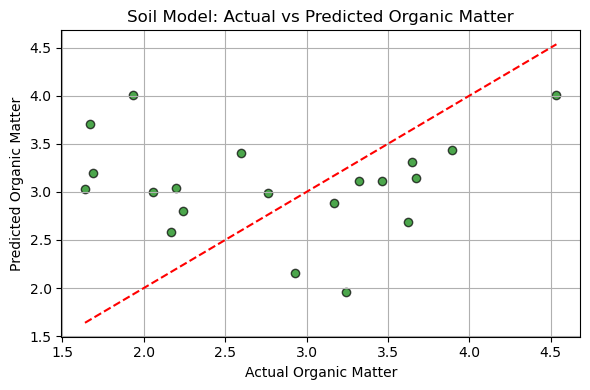

In [20]:
# --- Plot: Predicted vs Actual Organic Matter ---
y_pred_soil = rf_soil.predict(X_soil_test)

plt.figure(figsize=(6, 4))
plt.scatter(y_soil_test, y_pred_soil, color='green', edgecolor='black', alpha=0.7)
plt.plot([y_soil_test.min(), y_soil_test.max()],
         [y_soil_test.min(), y_soil_test.max()], 'r--')
plt.xlabel("Actual Organic Matter")
plt.ylabel("Predicted Organic Matter")
plt.title("Soil Model: Actual vs Predicted Organic Matter")
plt.grid(True)
plt.tight_layout()
plt.show()


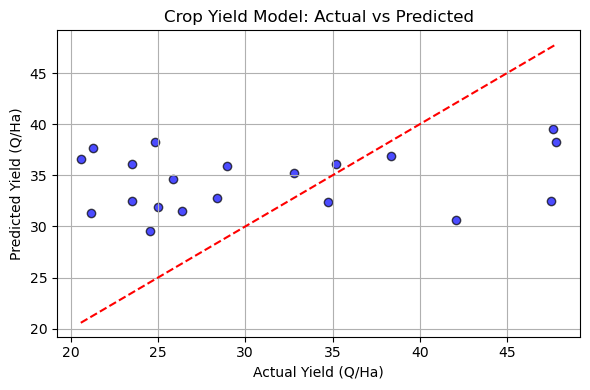

In [21]:
# --- Plot: Predicted vs Actual Yield ---
y_pred_yield = rf_yield.predict(X_test)

plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred_yield, color='blue', edgecolor='black', alpha=0.7)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Yield (Q/Ha)")
plt.ylabel("Predicted Yield (Q/Ha)")
plt.title("Crop Yield Model: Actual vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\Asus\AppData\Local\Temp\ipykernel_22172\1131508035.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=soil_importances, y=soil_features, palette='viridis')


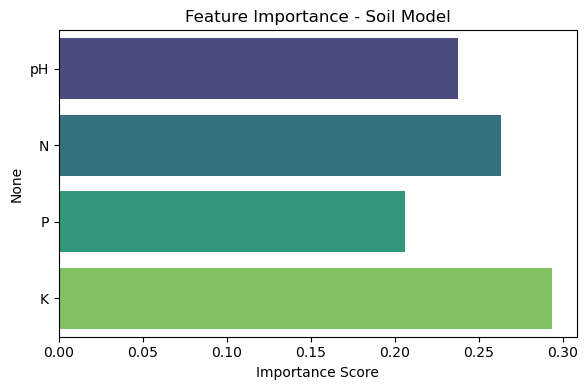

In [22]:
# --- Soil Feature Importance ---
soil_features = X_soil.columns
soil_importances = rf_soil.feature_importances_

plt.figure(figsize=(6, 4))
sns.barplot(x=soil_importances, y=soil_features, palette='viridis')
plt.title("Feature Importance - Soil Model")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()



C:\Users\Asus\AppData\Local\Temp\ipykernel_22172\3112456994.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=yield_importances, y=yield_features, palette='magma')


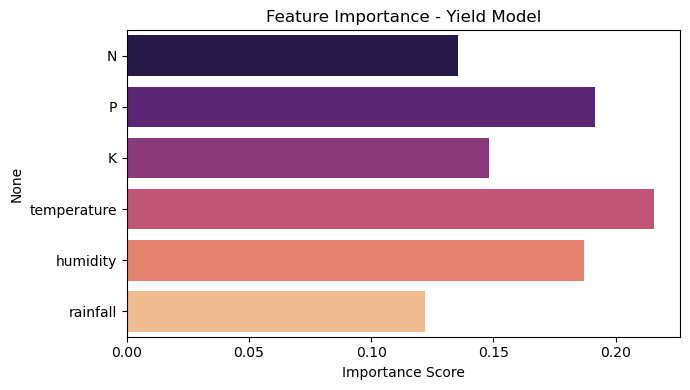

In [23]:
# --- Yield Feature Importance ---
yield_features = X.columns
yield_importances = rf_yield.feature_importances_

plt.figure(figsize=(7, 4))
sns.barplot(x=yield_importances, y=yield_features, palette='magma')
plt.title("Feature Importance - Yield Model")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()
